In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
fifa = pd.read_csv('fifa19.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## DATA CLEANING

In [3]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [3]:
# Drop columns
fifa.drop(columns=['Photo','Flag','Club Logo','Unnamed: 0','ID','Special','Body Type','Real Face',
                   'Loaned From','Jersey Number','Joined','Height', 'Weight'],inplace=True)

In [4]:
fifa.shape

(18207, 76)

In [5]:
fifa.isnull().sum()

Name                 0
Age                  0
Nationality          0
Overall              0
Potential            0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 76, dtype: int64

In [ ]:
defs <- positions[str_detect(positions, "B$")]
mids <- positions[str_detect(positions, "M$")]
f1 <- positions[str_detect(positions, "F$")]
f2 <- positions[str_detect(positions, "S$")]
f3 <- positions[str_detect(positions, "T$")]
f4 <- positions[str_detect(positions, "W$")]
fwds <- c(f1, f2, f3, f4)


In [6]:
fifa['Club'].isnull()
fifa['Club'].replace(np.NaN,'Free Agent',inplace=True)

In [7]:
fifa.dropna(subset=['Position'],axis=0,inplace=True)
fifa.reset_index(drop=True,inplace=True)

In [8]:
fifa.isnull().sum()

Name                 0
Age                  0
Nationality          0
Overall              0
Potential            0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1504
Length: 76, dtype: int64

In [9]:
fifa['Contract Valid Until']=fifa['Contract Valid Until'].str.split(pat=',').str[-1]
fifa['Contract Valid Until']=fifa['Contract Valid Until'].str.strip(' ')
fifa['Contract Valid Until'].fillna('2018',inplace=True)
fifa['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', '2025', '2026',
       '2018'], dtype=object)

In [10]:
fifa.rename(columns={'Contract Valid Until':'Contract Valid Years'},inplace=True)
fifa['Contract Valid Years']=fifa['Contract Valid Years'].astype('int')
fifa['Contract Valid Years']=fifa['Contract Valid Years'] - 2018
fifa['Contract Valid Years']

0        3
1        4
2        4
3        2
4        5
        ..
18142    1
18143    2
18144    3
18145    1
18146    1
Name: Contract Valid Years, Length: 18147, dtype: int64

In [11]:
fifa['Release Clause'].fillna('0',inplace=True)

In [12]:
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 76, dtype: int64

In [13]:
print(fifa['Value'].dtypes)
print(fifa['Wage'].dtypes)
print(fifa['Release Clause'].dtypes)

object
object
object


In [14]:
fifa['Value']=fifa['Value'].str.strip('€')
fifa['Wage']=fifa['Wage'].str.strip('€')
fifa['Release Clause']=fifa['Release Clause'].str.strip('€')

for i in np.arange(fifa.shape[0]):
    if fifa['Value'][i][-1] == 'M':
        fifa['Value'][i]= float(fifa['Value'][i].rstrip('M')) * 1000000
        
    elif fifa['Value'][i][-1] =='K':
          fifa['Value'][i]= float(fifa['Value'][i].rstrip('K')) * 1000
        
    else:
        fifa['Value'][i]= float(fifa['Value'][i])
        
        
        
    if fifa['Wage'][i][-1] =='K':
        fifa['Wage'][i]= float(fifa['Wage'][i].rstrip('K')) * 1000
        
    else:
        fifa['Wage'][i]= float(fifa['Wage'][i]) 
        
        
        
    if fifa['Release Clause'][i][-1] == 'M':
         fifa['Release Clause'][i]= float(fifa['Release Clause'][i].rstrip('M')) * 1000000
        
    elif fifa['Release Clause'][i][-1] =='K':
          fifa['Release Clause'][i]= float(fifa['Release Clause'][i].rstrip('K')) * 1000
        
    else:
        fifa['Release Clause'][i]= float(fifa['Release Clause'][i])     

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarn

In [15]:
fifa['Value']=fifa['Value'].astype('float')
fifa['Wage']=fifa['Wage'].astype('float')
fifa['Release Clause']=fifa['Release Clause'].astype('float')

In [16]:
fifa.isnull().any()

Name              False
Age               False
Nationality       False
Overall           False
Potential         False
                  ...  
GKHandling        False
GKKicking         False
GKPositioning     False
GKReflexes        False
Release Clause    False
Length: 76, dtype: bool

In [17]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


## DATA ANALYSIS

In [18]:
print('Total number of clubs : {0}'.format(fifa['Club'].nunique()))

Total number of clubs : 652


In [19]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],fifa.loc[fifa[pr_cols[i]].idxmax()][0]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Bes

In [20]:
fifa.sort_values("Value", ascending=False)[['Name', "Age", "Value", "Overall"]].head(20)

,Name,Age,Value,Overall
2,Neymar Jr,26,118500000.0,92
0,L. Messi,31,110500000.0,94
4,K. De Bruyne,27,102000000.0,91
5,E. Hazard,27,93000000.0,91
15,P. Dybala,24,89000000.0,89
16,H. Kane,24,83500000.0,89
25,K. Mbappé,19,81000000.0,88
7,L. Suárez,31,80000000.0,91
17,A. Griezmann,27,78000000.0,89
10,R. Lewandowski,29,77000000.0,90


In [21]:
fifa.sort_values("Potential", ascending=False)[['Name', "Age", "Value", "Overall", 'Potential']].head(20)

,Name,Age,Value,Overall,Potential
25,K. Mbappé,19,81000000.0,88,95
0,L. Messi,31,110500000.0,94,94
15,P. Dybala,24,89000000.0,89,94
1,Cristiano Ronaldo,33,77000000.0,94,94
2,Neymar Jr,26,118500000.0,92,93
3,De Gea,27,72000000.0,91,93
9,J. Oblak,25,68000000.0,90,93
229,G. Donnarumma,19,29000000.0,82,93
79,Marco Asensio,22,54000000.0,85,92
1143,Vinícius Júnior,17,17500000.0,77,92


## DATA VIZ

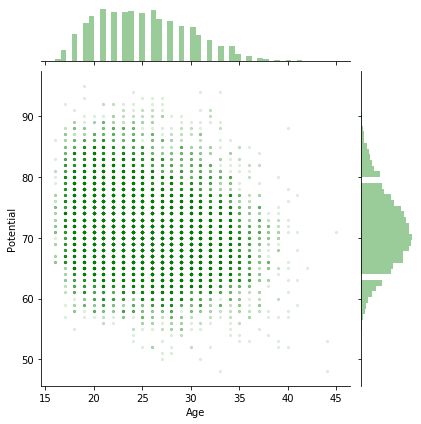

In [22]:
sns.jointplot(x=fifa['Age'],y=fifa['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'green'},
              marginal_kws={'color':'green'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


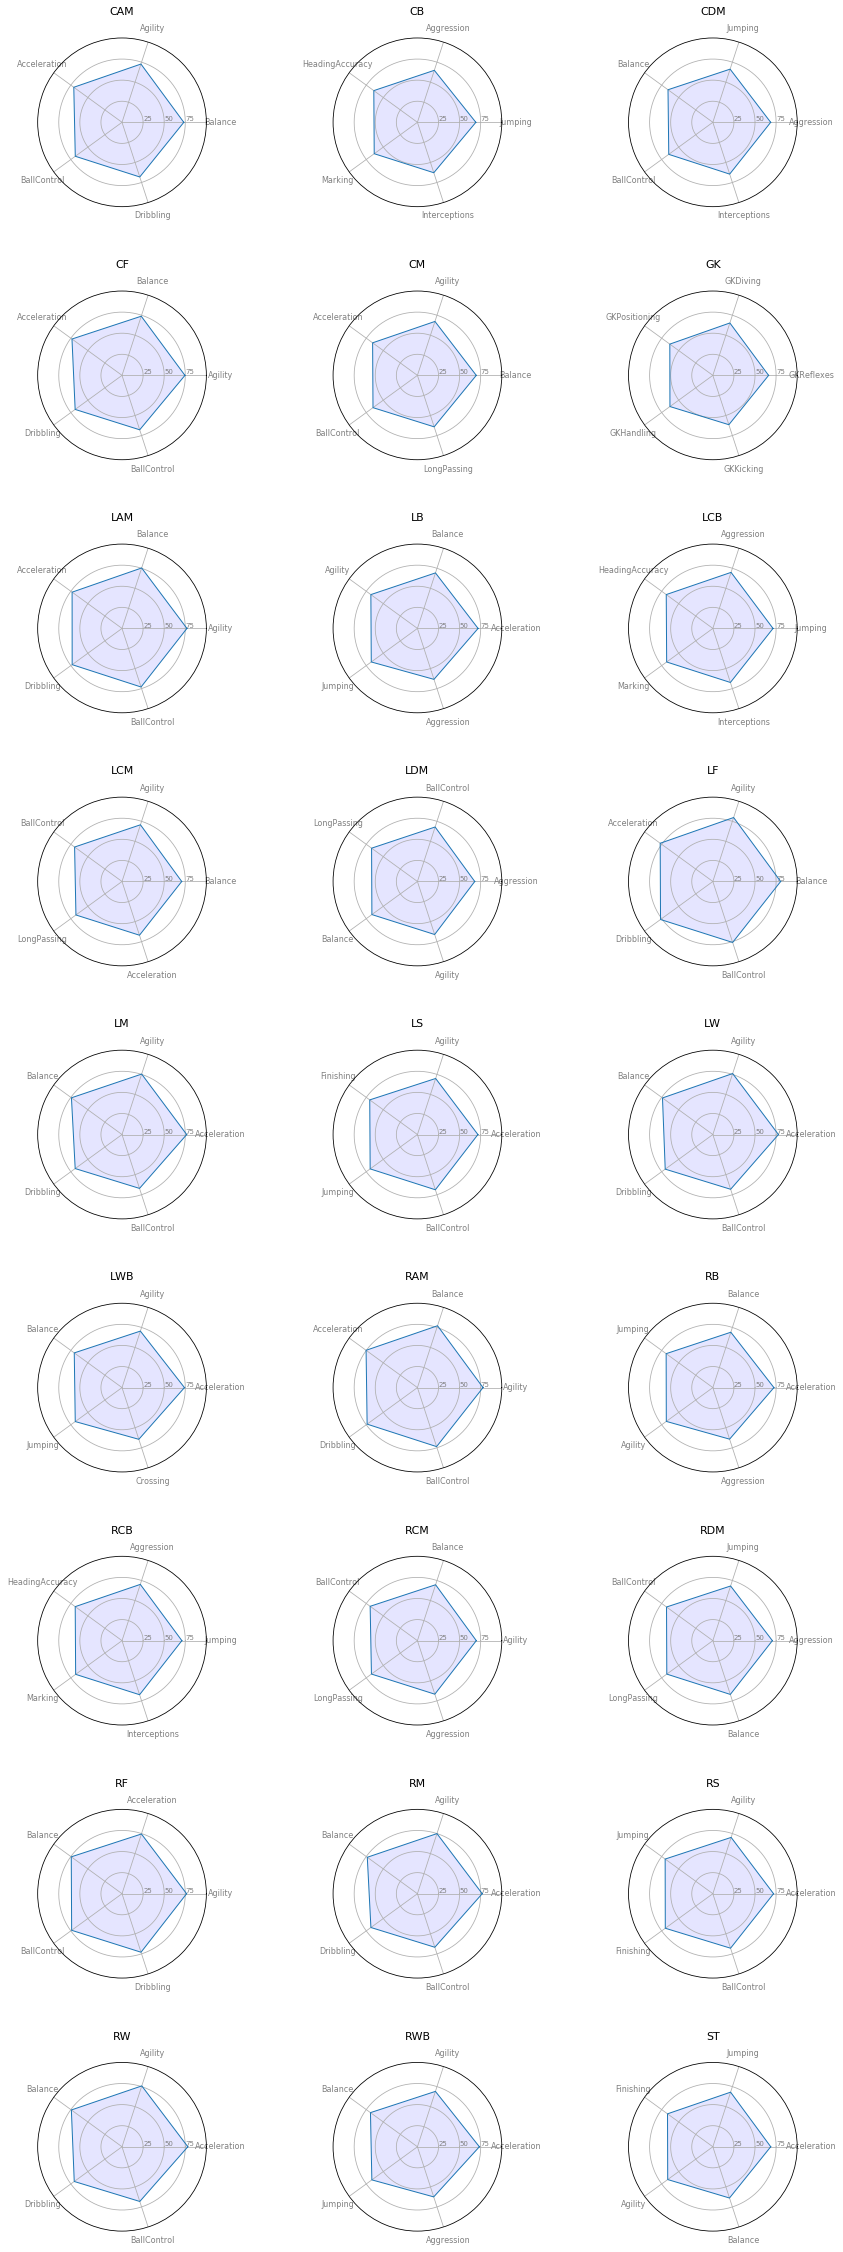

In [23]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)
    
    values = list(top_features.values())
    values += values[:1]
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(10, 3, idx, polar=True)

    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

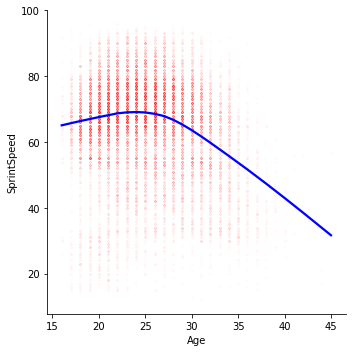

In [24]:
sns.lmplot(data = fifa, x = 'Age', y = 'SprintSpeed', lowess=True, scatter_kws={'alpha':0.01, 's':5,'color':'red'}, 
           line_kws={'color':'blue'})

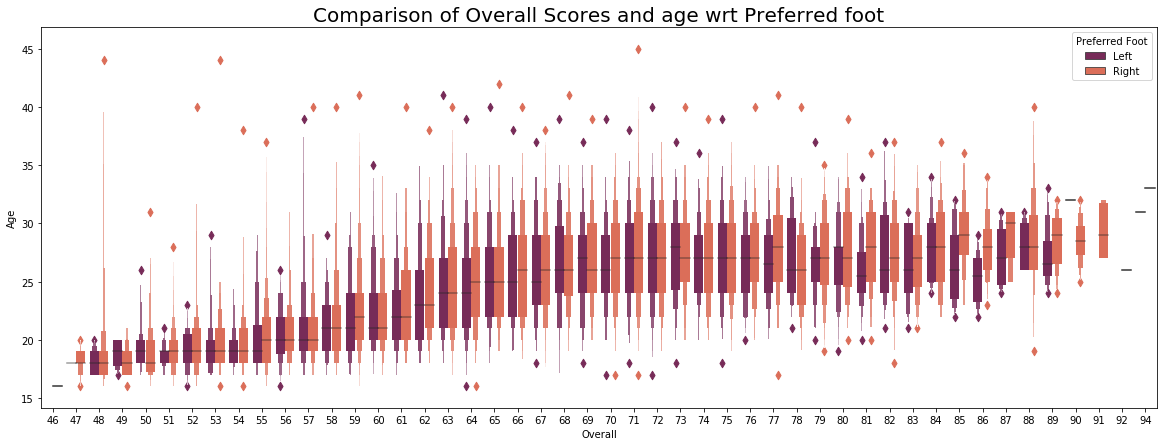

In [25]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(fifa['Overall'], fifa['Age'], hue = fifa['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

In [26]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [27]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18147 non-null  object 
 1   Age                       18147 non-null  int64  
 2   Nationality               18147 non-null  object 
 3   Overall                   18147 non-null  int64  
 4   Potential                 18147 non-null  int64  
 5   Club                      18147 non-null  object 
 6   Value                     18147 non-null  float64
 7   Wage                      18147 non-null  float64
 8   Preferred Foot            18147 non-null  object 
 9   International Reputation  18147 non-null  float64
 10  Weak Foot                 18147 non-null  float64
 11  Skill Moves               18147 non-null  float64
 12  Work Rate                 18147 non-null  object 
 13  Position                  18147 non-null  object 
 14  Contra

In [28]:
fifa_num= fifa._get_numeric_data()
fifa_num

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Contract Valid Years,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,3,84.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,4,84.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,4,79.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,2,17.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,5,93.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,19,47,65,60000.0,1000.0,1.0,2.0,2.0,1,34.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18143,19,47,63,60000.0,1000.0,1.0,2.0,2.0,2,23.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18144,16,47,67,60000.0,1000.0,1.0,3.0,2.0,3,25.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18145,17,47,66,60000.0,1000.0,1.0,3.0,2.0,1,44.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [29]:
fifa_num = fifa_num.loc[:, ~fifa_num.columns.str.startswith('GK')]

In [30]:
fifa=pd.DataFrame(fifa)

In [31]:
fifa_num.drop(['Value','Wage','Overall'],axis= 1, inplace= True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
fifa_num

,Age,Potential,International Reputation,Weak Foot,Skill Moves,Contract Valid Years,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
0,31,94,5.0,4.0,4.0,3,84.0,95.0,70.0,90.0,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0
1,33,94,5.0,4.0,5.0,4,84.0,94.0,89.0,81.0,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0
2,26,93,5.0,5.0,5.0,4,79.0,87.0,62.0,84.0,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0
3,27,93,4.0,3.0,1.0,2,17.0,13.0,21.0,50.0,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,138600000.0
4,27,92,4.0,5.0,4.0,5,93.0,82.0,55.0,92.0,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,19,65,1.0,2.0,2.0,1,34.0,38.0,40.0,49.0,...,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,143000.0
18143,19,63,1.0,2.0,2.0,2,23.0,52.0,52.0,43.0,...,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,113000.0
18144,16,67,1.0,3.0,2.0,3,25.0,40.0,46.0,38.0,...,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,165000.0
18145,17,66,1.0,3.0,2.0,1,44.0,50.0,39.0,42.0,...,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,143000.0


In [33]:
from sklearn.preprocessing import StandardScaler
fifa_scaled = StandardScaler().fit_transform(fifa_num)

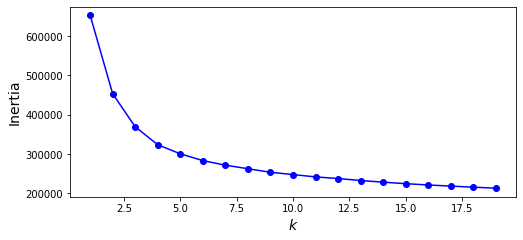

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(fifa_scaled)
                for k in range(1, 20)]

# Extract the inertia for each model
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the inertia
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

# plt.axis([1, 8.5, 0, 4000])
plt.show()

In [35]:
kmeans = KMeans(n_clusters=6, random_state=42)
# By default it will initialize the centroids using K-means++. You can also apply a set of user-defined centroids.
y_pred = kmeans.fit_predict(fifa_scaled)


In [37]:
fifa.drop(['GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1,inplace=True)

In [38]:
fifa['Cluster']= y_pred

In [42]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Contract Valid Years', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Release Clause', 'Cluster'],
      dtype='object')

In [10]:
fifa.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [ ]:
fifa["PositionGroup"] = 'Low'
fifa.loc[fifa["Position"]==['LW','RF','ST','LW',''], "PositionGroup"]= "Forward"
fifa.loc[fifa["Position"]==['LW','RF','ST','LW',''], "PositionGroup"]= "Mid"
fifa.loc[fifa["Position"]==['LW','RF','ST','LW',''], "PositionGroup"]= "Defence"





